## Healthstatus Classification
This analysis will use a modified version of the raw data used throughout this project. This analysis will use only data from 2015.
The goal of this will be to classify our existing trees based on the 'healthstatus' attribute. 

In [1]:
library(rpart)
library(rpart.plot)
library(ggplot2)
library(caret)
library(here)
library(pROC)

data = read.csv(here("data","2015_data.csv"))

Warning message:
"package 'rpart.plot' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'here' was built under R version 3.6.3"here() starts at D:/nyctrees
Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var



In [3]:
options(repr.matrix.max.rows=600, repr.matrix.max.cols=200)
head(data)

ntaname_full,nta,boro_ct,borocode,boroname,cncldist,inf_guard,inf_shoes,latitude,longitude,sidw_crack,st_assem,st_senate,healthstatus,tree_dbh,x_sp,y_sp,zip_city,zipcode,genus,species,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
Allerton-Pelham Gardens,BX31,2031200,2,Bronx,13,No,No,40.86346,-73.84218,No,80,34,Good,13,1027903,253900.5,Bronx,10469,ginkgo,biloba,3432.5,1576.357,1856.143,29.08333,28.52619,30.31905,0,9.333333,2405.762,64269.24,11775.45,25223.55,3728.381,12.20238,17.38571,34.81905,23.7119,23.15476,8.564286,9.733333,43.53571,8.311905,40.14286,3.859524,1.292857,2.878571,40.75476,1412.762,78.36429,17.85476,3.638095,0.1714286,12.19048
Allerton-Pelham Gardens,BX31,2035000,2,Bronx,12,No,No,40.86875,-73.84890,No,80,36,Good,1,1026041,255823.2,Bronx,10469,picea,triacanthos,3432.5,1576.357,1856.143,29.08333,28.52619,30.31905,0,9.333333,2405.762,64269.24,11775.45,25223.55,3728.381,12.20238,17.38571,34.81905,23.7119,23.15476,8.564286,9.733333,43.53571,8.311905,40.14286,3.859524,1.292857,2.878571,40.75476,1412.762,78.36429,17.85476,3.638095,0.1714286,12.19048
Allerton-Pelham Gardens,BX31,2036000,2,Bronx,12,No,No,40.86816,-73.84270,No,83,36,Good,19,1027756,255609.5,Bronx,10469,platanus,acerifolia,3432.5,1576.357,1856.143,29.08333,28.52619,30.31905,0,9.333333,2405.762,64269.24,11775.45,25223.55,3728.381,12.20238,17.38571,34.81905,23.7119,23.15476,8.564286,9.733333,43.53571,8.311905,40.14286,3.859524,1.292857,2.878571,40.75476,1412.762,78.36429,17.85476,3.638095,0.1714286,12.19048
Allerton-Pelham Gardens,BX31,2031800,2,Bronx,13,No,No,40.86470,-73.85190,No,80,34,Good,8,1025214,254344.6,Bronx,10469,prunus,calleryana,3432.5,1576.357,1856.143,29.08333,28.52619,30.31905,0,9.333333,2405.762,64269.24,11775.45,25223.55,3728.381,12.20238,17.38571,34.81905,23.7119,23.15476,8.564286,9.733333,43.53571,8.311905,40.14286,3.859524,1.292857,2.878571,40.75476,1412.762,78.36429,17.85476,3.638095,0.1714286,12.19048
Allerton-Pelham Gardens,BX31,2034800,2,Bronx,13,No,No,40.86609,-73.85482,Yes,80,36,Good,25,1024407,254852.1,Bronx,10469,fraxinus,pennsylvanica,3432.5,1576.357,1856.143,29.08333,28.52619,30.31905,0,9.333333,2405.762,64269.24,11775.45,25223.55,3728.381,12.20238,17.38571,34.81905,23.7119,23.15476,8.564286,9.733333,43.53571,8.311905,40.14286,3.859524,1.292857,2.878571,40.75476,1412.762,78.36429,17.85476,3.638095,0.1714286,12.19048
Allerton-Pelham Gardens,BX31,2031400,2,Bronx,13,No,No,40.86245,-73.84532,No,80,34,Good,6,1027035,253530.1,Bronx,10469,tilia,cordata,3432.5,1576.357,1856.143,29.08333,28.52619,30.31905,0,9.333333,2405.762,64269.24,11775.45,25223.55,3728.381,12.20238,17.38571,34.81905,23.7119,23.15476,8.564286,9.733333,43.53571,8.311905,40.14286,3.859524,1.292857,2.878571,40.75476,1412.762,78.36429,17.85476,3.638095,0.1714286,12.19048


Based on the output below, we can see that we have a large class imbalance between the three levels. We'll take two approaches to address this issue. 

The first will  start with downsampling the data.

In [7]:
summary(data$healthstatus)

Dead   Good   Poor 
 13874 590451  26283

In [8]:
set.seed(42)
down_data = downSample(data, data$healthstatus)
part = createDataPartition(down_data$healthstatus, p = 0.80, list = FALSE)
train = down_data[part,]
test = down_data[-part,]

In [17]:
summary(train$healthstatus)

Dead  Good  Poor 
11100 11100 11100

### Downsampling Tree
After downsampling our data, we'll look at classifying for healthstatus on our data

In [10]:
# removed tree_dbh, boro_ct
down_health_cart = rpart(healthstatus ~ latitude + longitude + zipcode + st_assem + sidw_crack + st_senate + inf_guard, data = train)

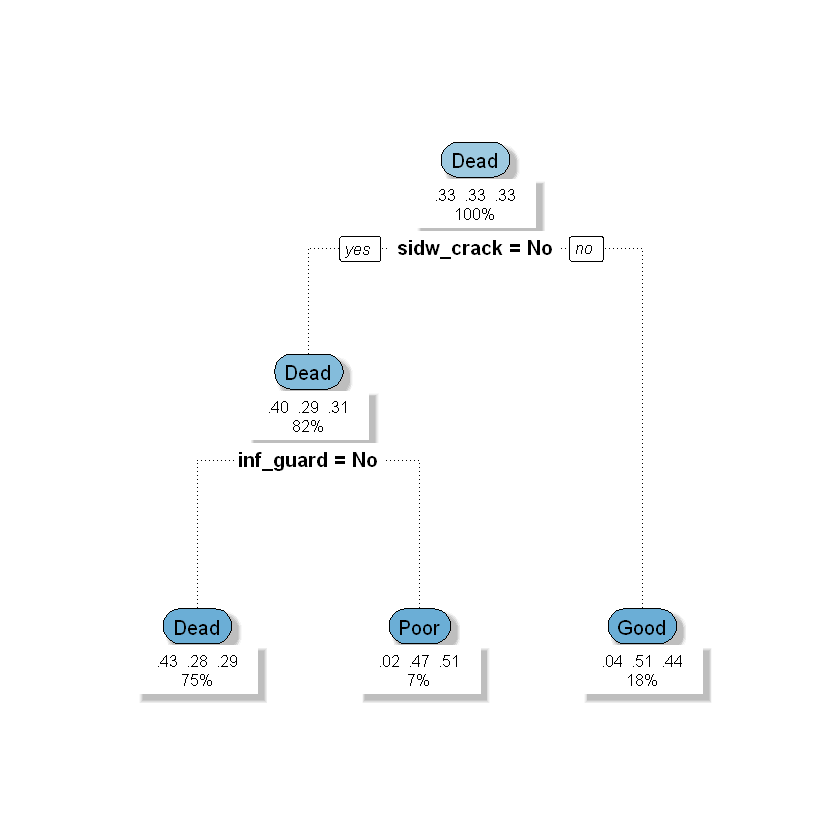

In [11]:
rpart.plot(down_health_cart, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

In [47]:
#Train prediction accuracy
train_predict = predict(down_health_cart, train, type = "class")
mean(train_predict == train$healthstatus) 

#Test prediction accuracy
test_predict = predict(down_health_cart, test, type = "class")
mean(test_predict == test$healthstatus)

[1] 0.4509009

[1] 0.4473684

In [48]:
#Confusion Matrix, etc.
confusion_matrix <- table(predicted = test_predict, actual = test$healthstatus)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.50
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.27
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.35
F1score

         actual
predicted Dead Good Poor
     Dead 2703 1766 1813
     Good   58  740  681
     Poor   13  268  280

[1] 0.5003381

[1] 0.2667628

[1] 0.3479897

In [29]:
down_health_cart2 = rpart(healthstatus ~ latitude + longitude + zipcode + st_assem + st_senate + sidw_crack + inf_guard + boro_ct + tree_dbh, data = train)

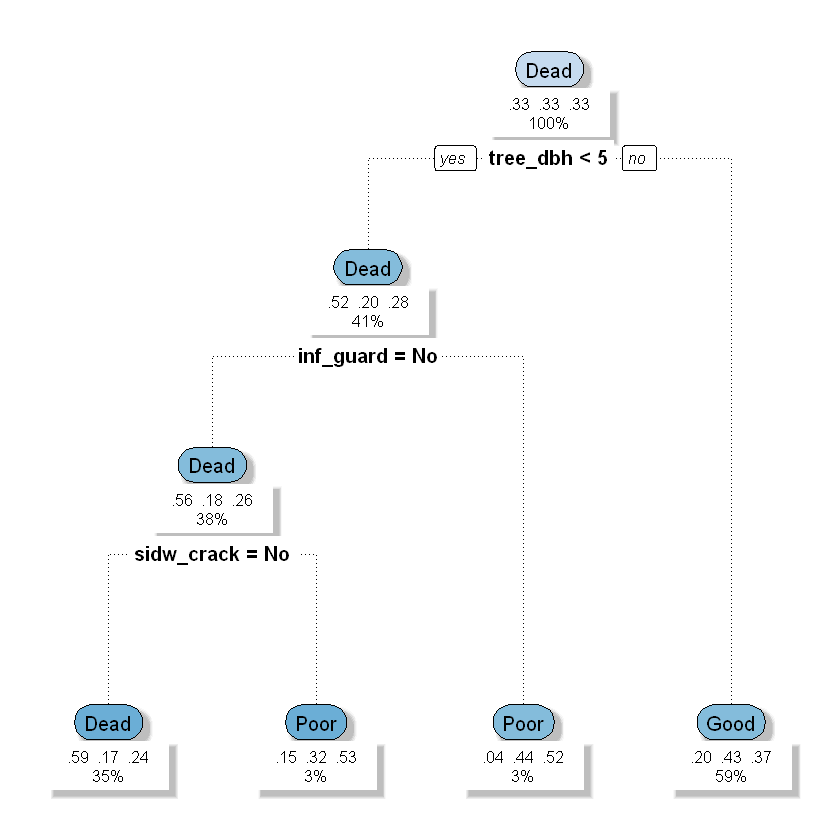

In [30]:
rpart.plot(down_health_cart2, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

In [45]:
#Train prediction accuracy
train_predict = predict(down_health_cart2, train, type = "class")
mean(train_predict == train$healthstatus) 

#Test prediction accuracy
test_predict = predict(down_health_cart2, test, type = "class")
mean(test_predict == test$healthstatus)

[1] 0.4917718

[1] 0.4881038

In [46]:
#Confusion Matrix, etc.
confusion_matrix <- table(predicted = test_predict, actual = test$healthstatus)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.43
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.76
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.54
F1score

         actual
predicted Dead Good Poor
     Dead 1698  493  680
     Good 1028 2108 1838
     Poor   48  173  256

[1] 0.4238038

[1] 0.7599135

[1] 0.5441404

### Upsampling Tree

In [2]:
up_data = upSample(data, data$healthstatus)
up_part = createDataPartition(up_data$healthstatus, p = 0.80, list = FALSE)
up_train = up_data[up_part,]
up_test = up_data[-up_part,]

In [41]:
summary(up_train$healthstatus)

Dead   Good   Poor 
472361 472361 472361

In [11]:
up_health_cart = rpart(healthstatus ~ latitude + longitude + zipcode + st_assem + sidw_crack + st_senate + inf_guard, data = up_train)

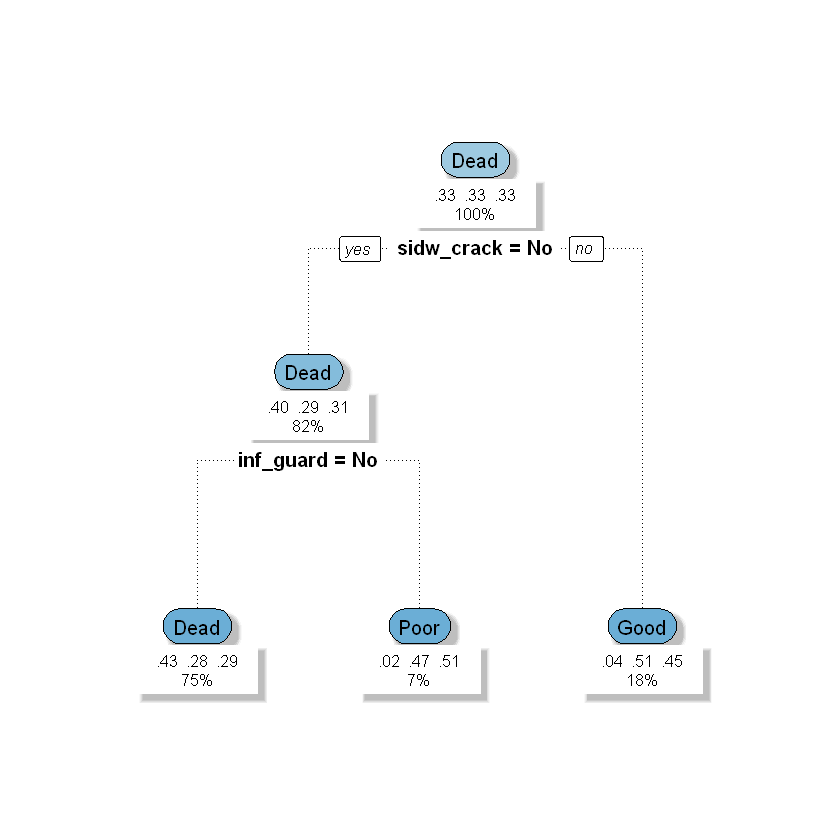

In [20]:
rpart.plot(up_health_cart, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

In [12]:
#Train prediction accuracy
train_predict = predict(up_health_cart, up_train, type = "class")
mean(train_predict == up_train$healthstatus) 

#Test prediction accuracy
test_predict = predict(up_health_cart, up_test, type = "class")
mean(test_predict == up_test$healthstatus)

[1] 0.4501176

[1] 0.4497728

In [13]:
confusion_matrix <- table(predicted = test_predict, actual = up_test$healthstatus)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.43
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.76
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.55
F1score

         actual
predicted   Dead   Good   Poor
     Dead 114879  74538  77482
     Good   2743  32748  28894
     Poor    468  10804  11714

[1] 0.5086278

[1] 0.2773139

[1] 0.3589314

In [8]:
up_health_cart2 = rpart(healthstatus ~ latitude + longitude + zipcode + st_assem + st_senate + sidw_crack + inf_guard + boro_ct + tree_dbh, data = up_train)

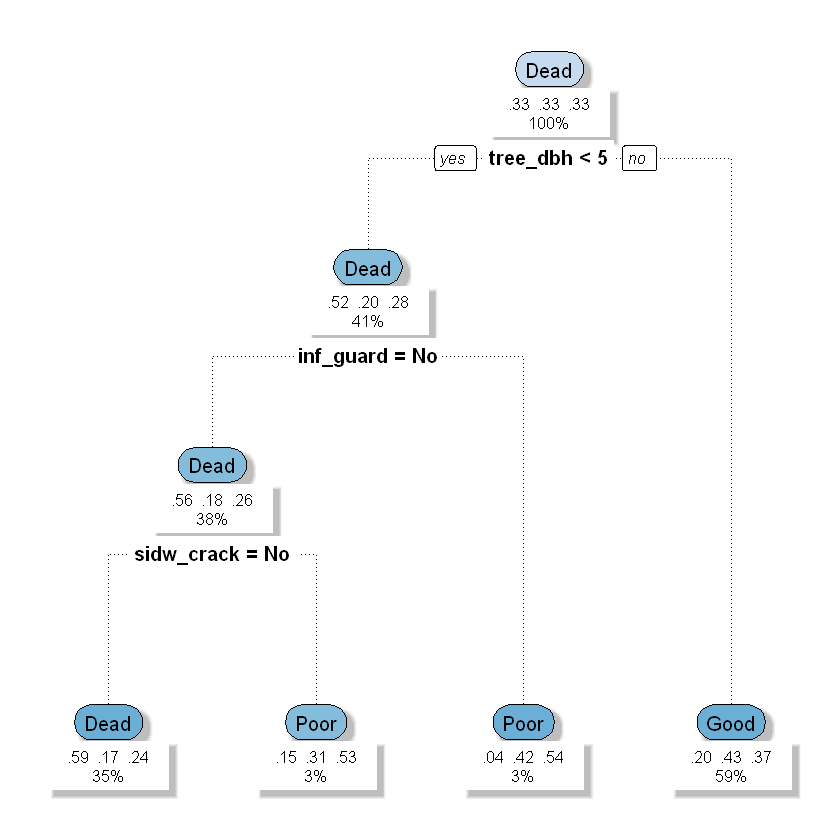

In [38]:
rpart.plot(up_health_cart2, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

In [9]:
#Train prediction accuracy
train_predict = predict(up_health_cart2, up_train, type = "class")
mean(train_predict == up_train$healthstatus) 

#Test prediction accuracy
test_predict = predict(up_health_cart2, up_test, type = "class")
mean(test_predict == up_test$healthstatus)

[1] 0.4916452

[1] 0.4926271

In [10]:
confusion_matrix <- table(predicted = test_predict, actual = up_test$healthstatus)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.43
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.76
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.55
F1score

         actual
predicted  Dead  Good  Poor
     Dead 73274 20671 29966
     Good 42733 90038 76913
     Poor  2083  7381 11211

[1] 0.4293985

[1] 0.7624524

[1] 0.5493907

### Classifying Treehealth from Census Data
With the performance metrics from our upsampled data, we'll use this same dataset for the census data. 

In [3]:
up_census_cart = rpart(healthstatus ~ TotalPop + Men + Women + Hispanic + White + Black + Native + Asian + Citizen + Income + IncomeErr + IncomePerCap + IncomePerCapErr + Poverty + ChildPoverty + Professional + Service + Office + Construction + Production + Drive + Carpool + Transit + Walk + OtherTransp + WorkAtHome + MeanCommute + Employed + PrivateWork + PublicWork + SelfEmployed + FamilyWork + Unemployment, data = up_train)

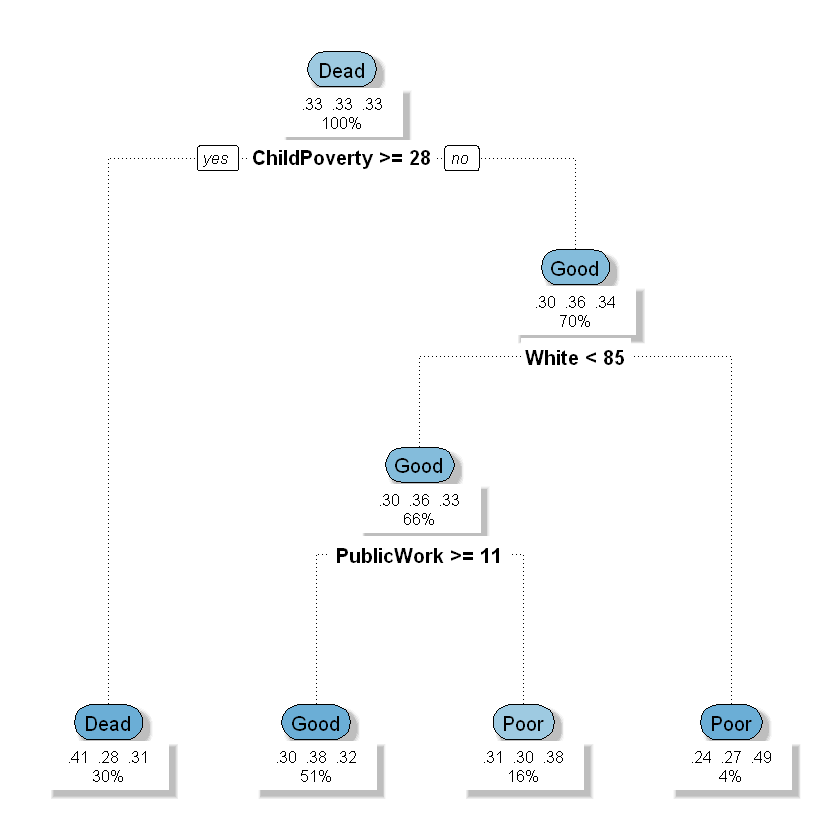

In [4]:
rpart.plot(up_census_cart, yesno=1, fallen.leaves=TRUE, under = TRUE, box.palette = "Blues", branch.lty = 3, shadow.col = "gray")

In [5]:
#Train prediction accuracy
train_predict = predict(up_census_cart, up_train, type = "class")
mean(train_predict == up_train$healthstatus) 

#Test prediction accuracy
test_predict = predict(up_census_cart, up_test, type = "class")
mean(test_predict == up_test$healthstatus)

[1] 0.3924618

[1] 0.3915516

In [6]:
confusion_matrix <- table(predicted = test_predict, actual = up_test$healthstatus)
confusion_matrix

precision <- confusion_matrix[2,2]/sum(confusion_matrix[2,]) #precision - 0.38
precision

recall <- confusion_matrix[2,2]/sum(confusion_matrix[,2]) #recall - 0.58
recall

F1score <- 2 * ((precision * recall)/(precision + recall)) #F1 score - 0.46
F1score

         actual
predicted  Dead  Good  Poor
     Dead 42657 29264 32651
     Good 54557 68109 57490
     Poor 20876 20717 27949

[1] 0.3780557

[1] 0.576755

[1] 0.4567304

## Conclusion
Below we can see a table that summarizes the models that we created. While the best performing model was the 'up_health_cart2' model from our UpSampled section, the 'down_health_cart2' model was close in performance. Both of these models had significantly better performance than the first version (up_health_cart and down_health_cart specifically). This could be attributed to the reintroduction of the 'boro_ct' and 'tree_dbh' attributes to the model. As we can see in the plots generated after each model, the tree_dbh attribute is used in classifying healthstatus for our tree data. 

|           | DownSampled      |                   |                |   UpSampled     |                |
|-----------|------------------|-------------------|----------------|-----------------|----------------|
|           | down_health_cart | down_health_cart2 | up_health_cart | up_health_cart2 | up_census_cart |
| accuracy  | 44.74            | 48.81             | 44.98          | 49.27           | 39.16          |
| precision | 50.03            | 42.38             | 50.86          | 42.93           | 37.81          |
| recall    | 26.68            | 75.99             | 27.73          | 76.14           | 57.68          |
| f1score   | 34.8             | 54.41             | 35.89          | 54.9            | 45.67          |